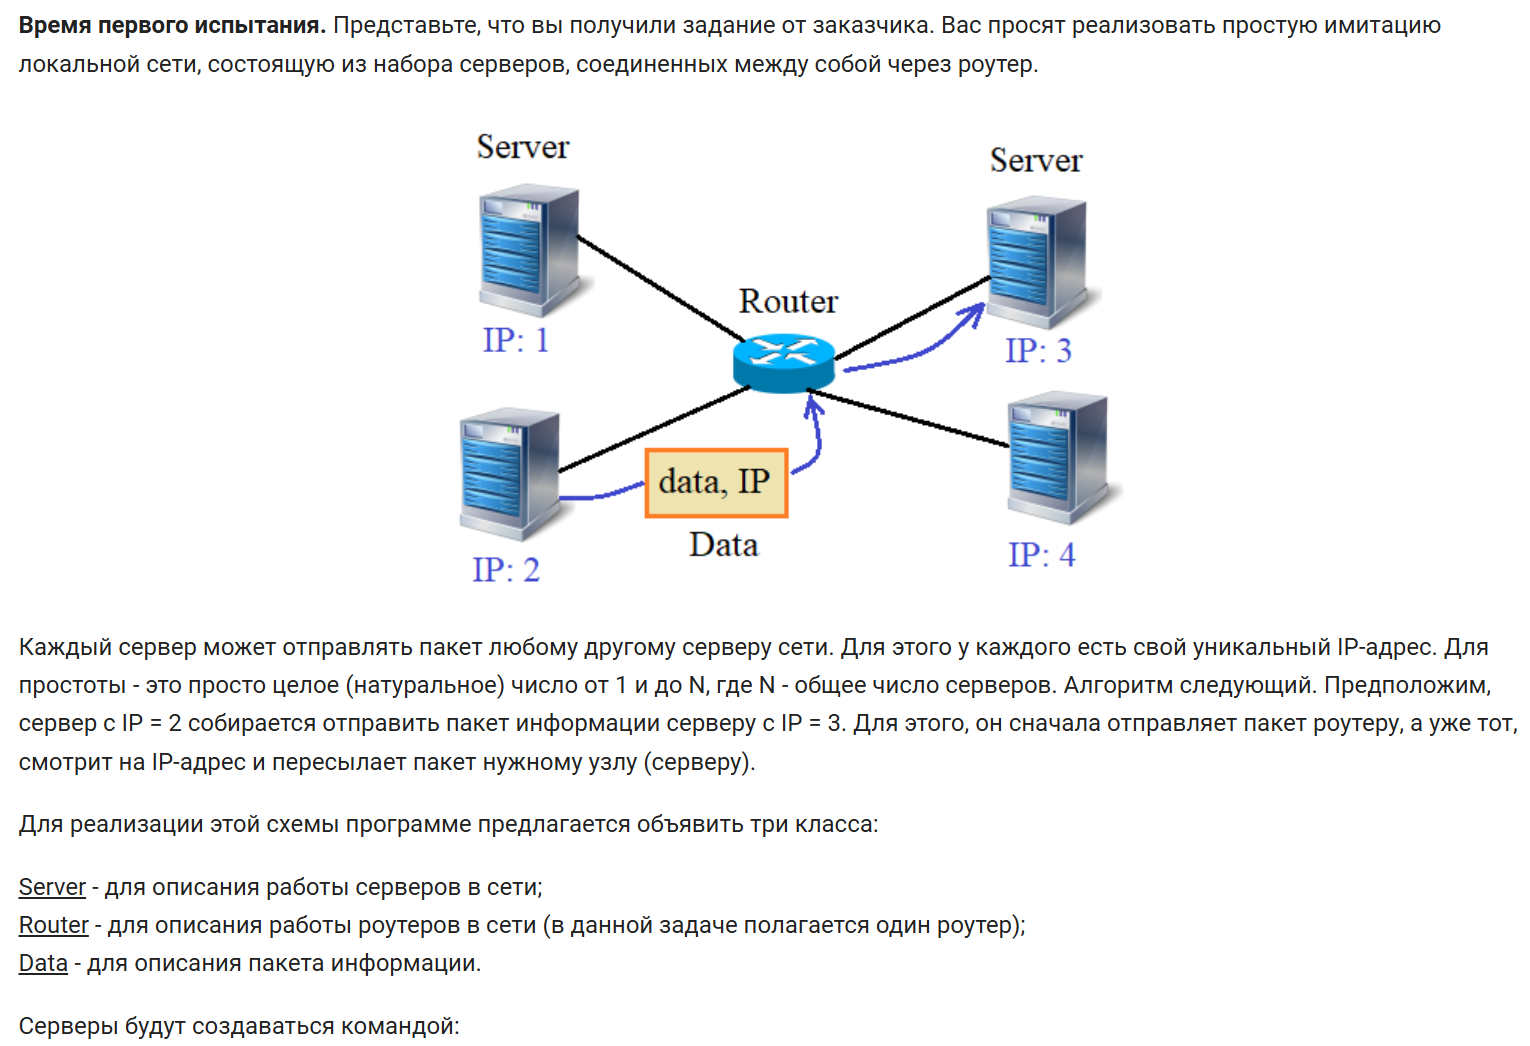

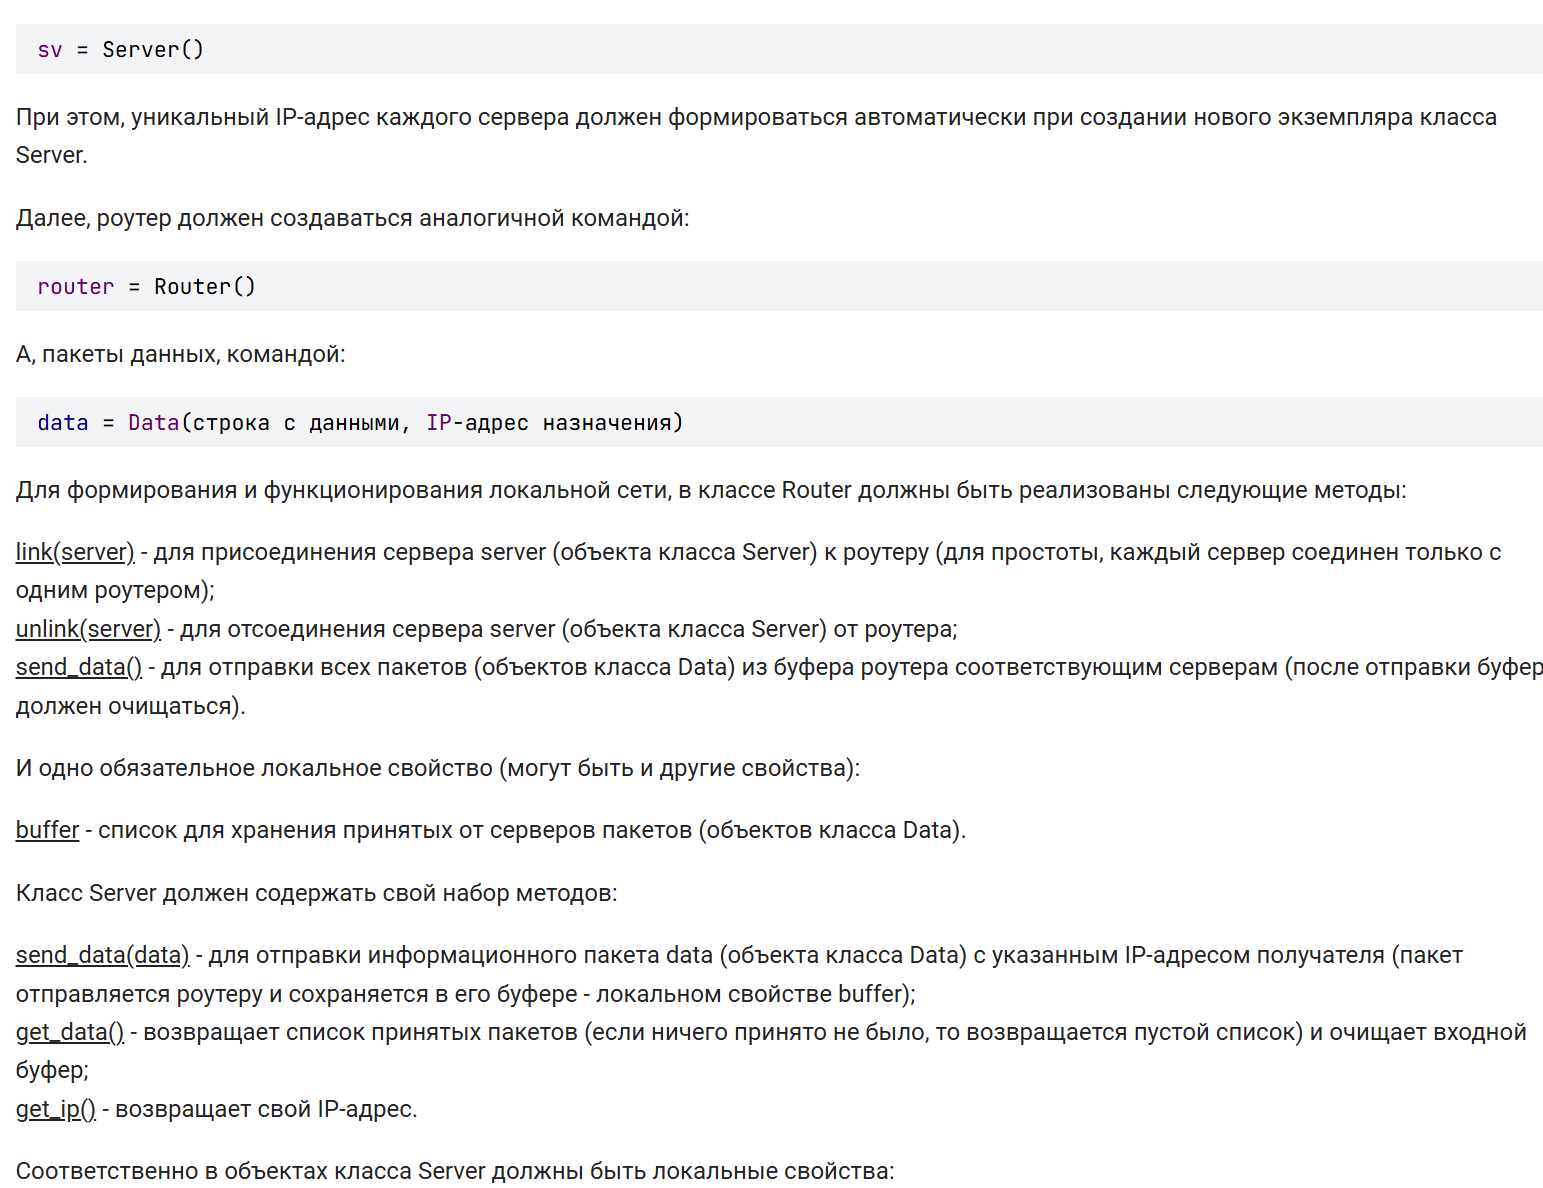

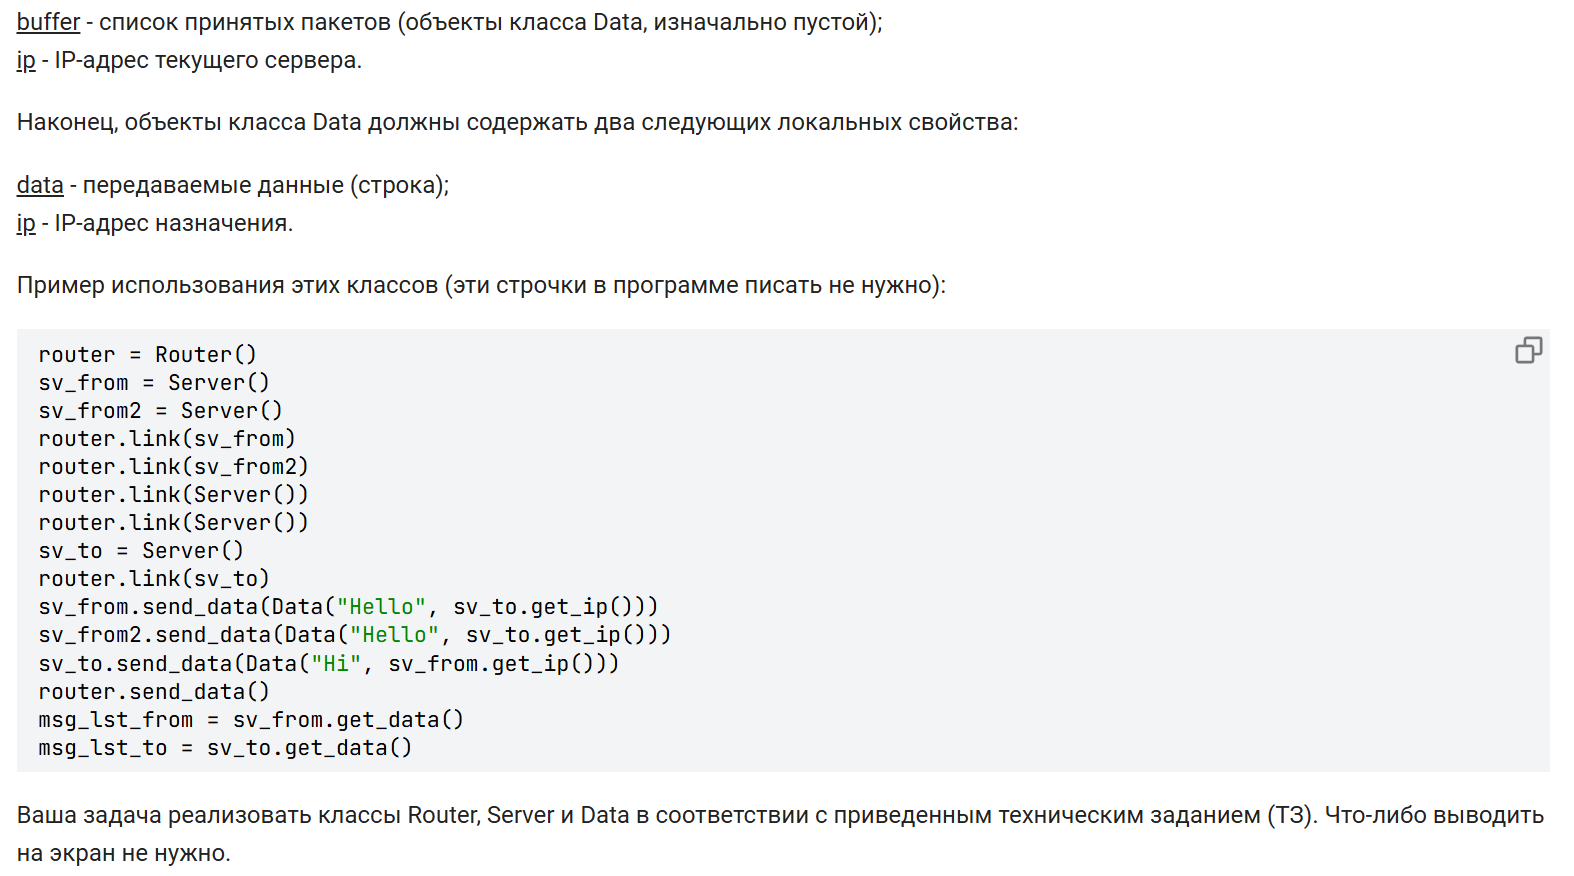

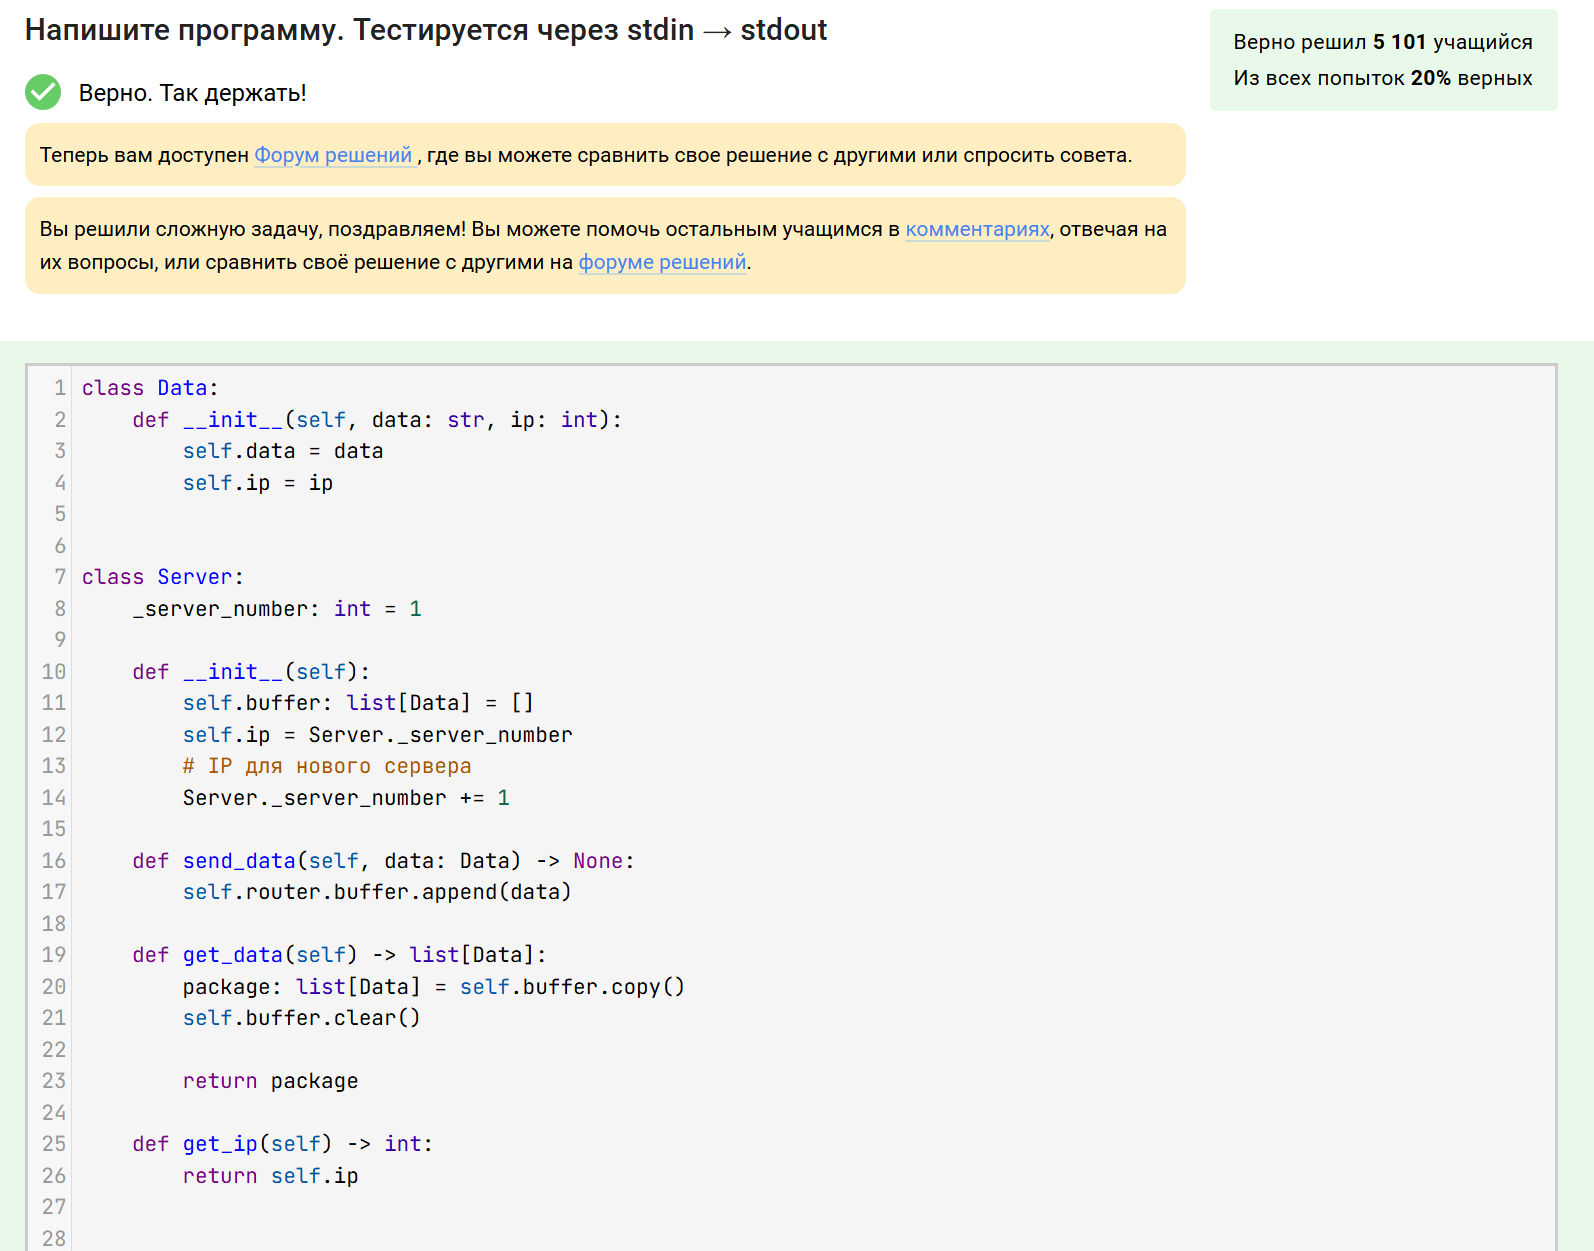
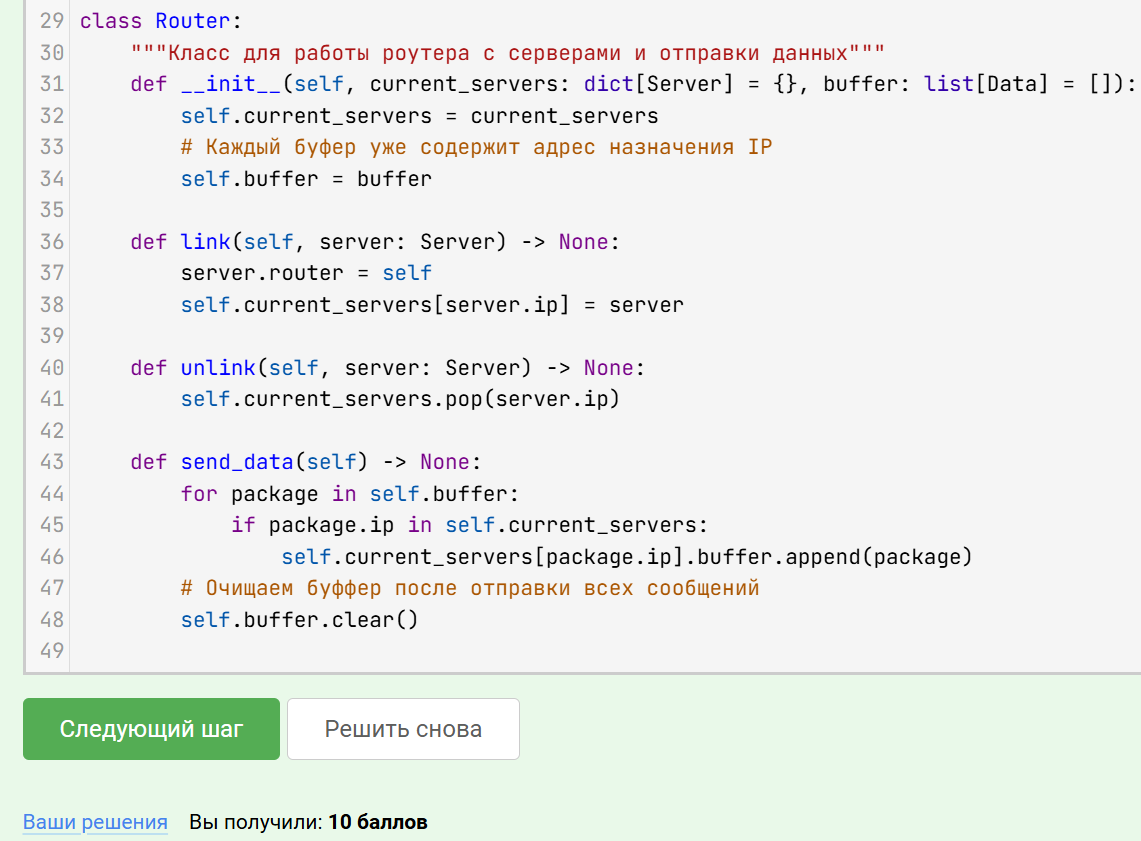

In [ ]:
class Data:
    "Информация в виде данных и сервера для которого предназначается."
    def __init__(self, data: str, ip: int):
        self.data = data
        self.ip = ip


class Server:
    "Сервер, отправляет информацию другим серверам через роутер и принимает информацию от других серверов."
    _server_number: int = 1
    
    def __init__(self):
        self.buffer: list[Data] = []
        self.ip = Server._server_number
        # IP для нового сервера
        Server._server_number += 1
        
    def send_data(self, data: Data) -> None:
        "Отправляет данные в буфер роутера."
        self.router.buffer.append(data)
    
    def get_data(self) -> list[Data]:
        "Принимает информацию от роутера."
        package: list[Data] = self.buffer.copy()
        self.buffer.clear()
        
        return package
    
    def get_ip(self) -> int:
        "Номер текущего сервера."
        return self.ip
        
        
class Router:
    """Класс для работы роутера с серверами и отправки данных."""
    def __init__(self, current_servers: dict[Server] = {}, buffer: list[Data] = []):
        self.current_servers = current_servers
        # Каждый буфер уже содержит адрес назначения IP
        self.buffer = buffer
    
    def link(self, server: Server) -> None:
        "Подключение роутера к серверу."
        self.current_servers[server.ip] = server
        server.router = self
    
    def unlink(self, server: Server) -> None:
        "Отключение сервера от роутера."
        self.current_servers.pop(server.ip)
        
    def send_data(self) -> None:
        "Отправка всех данных роутера каждому из подключенных серверов."
        for package in self.buffer:
            if package.ip in self.current_servers:
                self.current_servers[package.ip].buffer.append(package)
        # Очищаем буффер после отправки всех сообщений
        self.buffer.clear()
        